In [15]:
from scipy.spatial.distance import euclidean
import numpy as np
from raise_utils.data import DataLoader
from raise_utils.hooks import Hook
from matplotlib import pyplot as plt

In [11]:
def get_distances(x, y):
    """
    Get distances between points in each class and between classes.
    """
    class_1 = np.where(y == 0)[0]
    class_2 = np.where(y == 1)[0]
    
    # Find the distances between points in class 1
    distances_class_1 = []
    for i in range(len(x[class_1])):
        for j in range(i+1, len(x[class_1])):
            distance = euclidean(x[class_1][i], x[class_1][j])
            distances_class_1.append(distance)

    # Find the distances between points in class 2
    distances_class_2 = []
    for i in range(len(x[class_2])):
        for j in range(i+1, len(x[class_2])):
            distance = euclidean(x[class_2][i], x[class_2][j])
            distances_class_2.append(distance)

    # Find the distances between points in different classes
    distances_between_classes = []
    for i in range(len(x[class_1])):
        for j in range(len(x[class_2])):
            distance = euclidean(x[class_1][i], x[class_2][j])
            distances_between_classes.append(distance)
    
    return distances_class_1, distances_class_2, distances_between_classes

In [3]:
base_path = './DODGE Data/defect/'

In [6]:
def get_data(name: str):
    # For the Wang et al. experiments
    file_dic_wang = {"ivy1":     ["ivy-1.4.csv", "ivy-2.0.csv"],
                 "lucene1":  ["lucene-2.0.csv", "lucene-2.2.csv"],
                 "lucene2": ["lucene-2.2.csv", "lucene-2.4.csv"],
                 "poi1":     ["poi-1.5.csv", "poi-2.5.csv"],
                 "poi2": ["poi-2.5.csv", "poi-3.0.csv"],
                 "synapse1": ["synapse-1.0.csv", "synapse-1.1.csv"],
                 "synapse2": ["synapse-1.1.csv", "synapse-1.2.csv"],
                 "camel1": ["camel-1.2.csv", "camel-1.4.csv"],
                 "camel2": ["camel-1.4.csv", "camel-1.6.csv"],
                 "xerces1": ["xerces-1.2.csv", "xerces-1.3.csv"],
                 "jedit1": ["jedit-3.2.csv", "jedit-4.0.csv"],
                 "jedit2": ["jedit-4.0.csv", "jedit-4.1.csv"],
                 "log4j1": ["log4j-1.0.csv", "log4j-1.1.csv"],
                 "xalan1": ["xalan-2.4.csv", "xalan-2.5.csv"]
                 }
    
    def _binarize(x, y): y[y > 1] = 1
    dataset = DataLoader.from_files(
        base_path=base_path, files=file_dic_wang[name], hooks=[Hook('binarize', _binarize)])
    
    return dataset

In [34]:
data = get_data('camel2')
_, _, d = get_distances(np.array(data.x_train), np.array(data.y_train))

/tmp/ipykernel_3257/3552890647.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def _binarize(x, y): y[y > 1] = 1
/tmp/ipykernel_3257/3552890647.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def _binarize(x, y): y[y > 1] = 1


Text(0.5, 1.0, 'camel2')

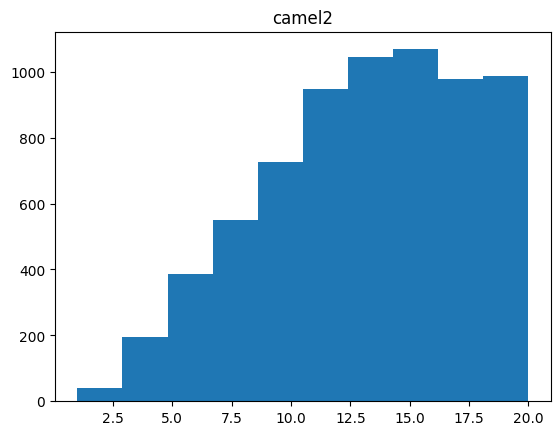

In [35]:
# Remove the max outlier
# camel2 has high pf (1.0)
d = np.array(d)
d_thresh = d[np.where(d < 20)[0]]

plt.hist(d_thresh)
plt.title('camel2')

In [36]:
data = get_data('lucene1')
_, _, d = get_distances(np.array(data.x_train), np.array(data.y_train))

/tmp/ipykernel_3257/3552890647.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def _binarize(x, y): y[y > 1] = 1
/tmp/ipykernel_3257/3552890647.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def _binarize(x, y): y[y > 1] = 1


Text(0.5, 1.0, 'lucene1')

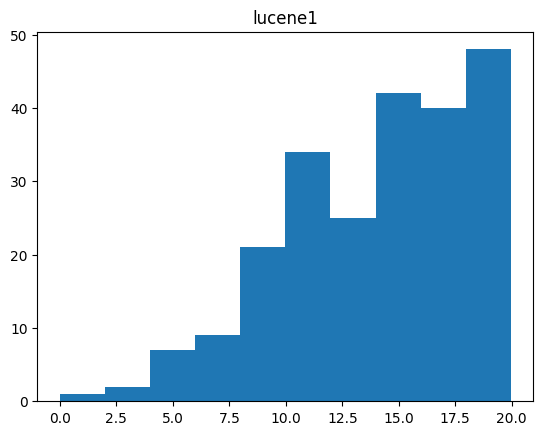

In [37]:
# Remove the max outlier
# lucene1 does well
d = np.array(d)
d_thresh = d[np.where(d < 20)[0]]

plt.hist(d_thresh)
plt.title('lucene1')